# Power Outages
This project uses major power outage data in the continental U.S. from January 2000 to July 2016. Here, a major power  outage is defined as a power outage that impacted at least 50,000 customers or caused an unplanned firm load loss of atleast 300MW. Interesting questions to consider include:
- Where and when do major power outages tend to occur?
- What are the characteristics of major power outages with higher severity? Variables to consider include location, time, climate, land-use characteristics, electricity consumption patterns, economic characteristics, etc. What risk factors may an energy company want to look into when predicting the location and severity of its next major power outage?
- What characteristics are associated with each category of cause?
- How have characteristics of major power outages changed over time? Is there a clear trend?

### Getting the Data
The data is downloadable [here](https://engineering.purdue.edu/LASCI/research-data/outages/outagerisks).

A data dictionary is available at this [article](https://www.sciencedirect.com/science/article/pii/S2352340918307182) under *Table 1. Variable descriptions*.

### Cleaning and EDA
- Note that the data is given as an Excel file rather than a CSV. Open the data in Excel or another spreadsheet application and determine which rows and columns of the Excel spreadsheet should be ignored when loading the data in pandas.
- Clean the data.
    - The power outage start date and time is given by `OUTAGE.START.DATE` and `OUTAGE.START.TIME`. It would be preferable if these two columns were combined into one datetime column. Combine `OUTAGE.START.DATE` and `OUTAGE.START.TIME` into a new datetime column called `OUTAGE.START`. Similarly, combine `OUTAGE.RESTORATION.DATE` and `OUTAGE.RESTORATION.TIME` into a new datetime column called `OUTAGE.RESTORATION`.
- Understand the data in ways relevant to your question using univariate and bivariate analysis of the data as well as aggregations.

*Hint 1: pandas can load multiple filetypes: `pd.read_csv`, `pd.read_excel`, `pd.read_html`, `pd.read_json`, etc.*

*Hint 2: `pd.to_datetime` and `pd.to_timedelta` will be useful here.*

*Tip: To visualize geospatial data, consider [Folium](https://python-visualization.github.io/folium/) or another geospatial plotting library.*

### Assessment of Missingness
- Assess the missingness of a column that is not missing by  design.

### Hypothesis Test
Find a hypothesis test to perform. You can use the questions at the top of the notebook for inspiration.

# Summary of Findings

### Introduction

The data used on this project contains information about the major outages that has happened historically in different states in the U.S. between January 2000 and July 2016.

- Major outages is defined by the Department of Energy as those outages that impacted at least 50k customers or caused an unexpected load loss of at least 300 MegaWatts 


Apart from major outage data, the dataset contains different characteristics of the states at the time that the outages occured. The datasate contains 55 different variables which can be divided into the following: 

- GENERAL INFORMATION (Time of the outage, Geographical information), 5 variables. 
- REGIONAL CLIMATE INFORMATION, 3 variables.
- OUTAGE EVENTS INFORMATION (Outage start and end, Cause, Effect of outage), 10 variables. 
- REGIONAL ELECTRICITY CONSUMPTION INFORMATION (Price, Consumption, Customers Served), 18 variables. 
- REGIONAL ECONOMIC CHARACTERISTICS (Economic output), 8 variables. 
- REGIONAL LAND-USE CHARACTERICS (Population, Land Area), 11 variables. 

This dataset can be used to analyze the causes of these outages, as well as the effects that these have in different states with varying characteristics and see if there is a pattern. 
We can also use to spot trends on these major outages.


### Cleaning and EDA
To cleaning data I started by combining the data found in the columns OUTAGE.START.DATE and OUTAGE.START.TIME into one single column and I did the same with OUTAGE.RESTORATION.DATE and OUTAGE.RESTORATION.TIME. <br>
After this was done, I dropped the original splitted columns since we don't want repeated data in the dataset. <br>
Then I decided to change the type of the column YEAR to int since float doesn't make sense for a year value. I thought of performing the same for MONTH but realized that I was not able to since MONTH column contains null values. <br>
Finally, I decided to check the rest of the data types for the rest of the columns and saw that a lot of numerical value columns such as Prices, Sales, Customers, Percentages, were object types, so I decided to convert them all into float type values. <br>

For the univariate anaylisis I decided to create 4 bar charts for different variables and the number of outages per each different value of each variable: 
1. State: we can see that California has had significantly more major outages since 2000. 
2. Climate Region: we can see that there is usually significantly more major outages in the northeast region of continental U.S.
3. Climate Category: we can see that major outages has happened more in normal weather climates. 
4. Cause Category: we can see that the majority of the outages have been caused by severe weather conditions followd by intentional attacks (most likely to the electric infraestructure).

Then I decided to compare the relationship between 2 categorical variables: Climate Region and Cause of the outage.<br> 
We can see from the stacked bar chart that the in the majority of the regions most of the major outages have been caused by Severe Weather, these regions being "Central, East North Central, South, Southeast and West". <br>
In the south region there has also been quite a big proportion of outages cuased by public appeal and in the West similar thing happens but is caused by system operability disruption. <br>
Then for the Northwest and the Southwest regions, the majority of the outages have been caused by intentional attacks instead. <br> 
And finally we have the West North Central Region where it is affected by severe weather but a bigger proportion have been caused by islanding. <br>

Finally, I decided to group the years and get the mean of the total electricity price for each year. You can kind of see an increase in price since 2000 up until 2007 where it peaked, and then it stabilize between 10 and 11.


### Assessment of Missingness

I think that the data in CAUSE.CATEGORY.DETAIL is NMAR. The only other reasonable variable that this one is related to is CAUSE.CATEGORY, but there are no missing values in this one. There is a discrepancy of nearly 500 null values between one and another. So it makes sense that this one is NMAR, maybe at the time were they recorded the data they just didn't know the specific details of what caused the major outage. The missingness of CAUSE.CATEGORY.DETAIL can't be explained by any other observed variable. <br>




### Hypothesis Test

Null hypothesis: in the US the distribution of the causes for major outages among the 2 states with most cases outages is the same. The difference between 2 samples is due to chance. (CA, TX) <br>
Alternative hypothesis: in the US the distributions of the causes of major outages of the two states are different. <br>

I performed a permutation test to check if the distributions of the different causes of major outages were similar in the two states with the highest number of these which are California and Texas. 
Test statistic used is TVD since we are working with categorical variables here. <br>
Using a significance level of 5% we got a p-value of 0, with this result we reject the null hypothesis and conclude that the distributions for the causes of major outages for these 2 states are different.<br>

Ideally I would like to perform more permutation tests comparing each pair of states and see how the distribution of the causes of major outages are related. 

# Code

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import re
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Higher resolution figures

### Cleaning and EDA

In [3]:
# Read in the excel file and format it 
outages = pd.read_excel('data/outage.xlsx', header=5, usecols='c:BE').drop(0, axis=0).reset_index(drop=True)

FileNotFoundError: [Errno 2] No such file or directory: 'data/outage.xlsx'

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
outages.head()

,YEAR,MONTH,U.S._STATE,POSTAL.CODE,NERC.REGION,CLIMATE.REGION,ANOMALY.LEVEL,CLIMATE.CATEGORY,OUTAGE.START.DATE,OUTAGE.START.TIME,OUTAGE.RESTORATION.DATE,OUTAGE.RESTORATION.TIME,CAUSE.CATEGORY,CAUSE.CATEGORY.DETAIL,HURRICANE.NAMES,OUTAGE.DURATION,DEMAND.LOSS.MW,CUSTOMERS.AFFECTED,RES.PRICE,COM.PRICE,IND.PRICE,TOTAL.PRICE,RES.SALES,COM.SALES,IND.SALES,TOTAL.SALES,RES.PERCEN,COM.PERCEN,IND.PERCEN,RES.CUSTOMERS,COM.CUSTOMERS,IND.CUSTOMERS,TOTAL.CUSTOMERS,RES.CUST.PCT,COM.CUST.PCT,IND.CUST.PCT,PC.REALGSP.STATE,PC.REALGSP.USA,PC.REALGSP.REL,PC.REALGSP.CHANGE,UTIL.REALGSP,TOTAL.REALGSP,UTIL.CONTRI,PI.UTIL.OFUSA,POPULATION,POPPCT_URBAN,POPPCT_UC,POPDEN_URBAN,POPDEN_UC,POPDEN_RURAL,AREAPCT_URBAN,AREAPCT_UC,PCT_LAND,PCT_WATER_TOT,PCT_WATER_INLAND
0,2011.0,7.0,Minnesota,MN,MRO,East North Central,-0.3,normal,2011-07-01 00:00:00,17:00:00,2011-07-03 00:00:00,20:00:00,severe weather,NaN,NaN,3060,NaN,70000.0,11.6,9.18,6.81,9.28,2332915,2114774,2113291,6562520,35.5491,32.225,32.2024,2308736.0,276286.0,10673.0,2595696.0,88.9448,10.644,0.411181,51268,47586,1.07738,1.6,4802,274182,1.75139,2.2,5348119.0,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.5927,8.40733,5.47874
1,2014.0,5.0,Minnesota,MN,MRO,East North Central,-0.1,normal,2014-05-11 00:00:00,18:38:00,2014-05-11 00:00:00,18:39:00,intentional attack,vandalism,NaN,1,NaN,NaN,12.12,9.71,6.49,9.28,1586986,1807756,1887927,5284231,30.0325,34.2104,35.7276,2345860.0,284978.0,9898.0,2640737.0,88.8335,10.7916,0.37482,53499,49091,1.08979,1.9,5226,291955,1.79,2.2,5457125.0,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.5927,8.40733,5.47874
2,2010.0,10.0,Minnesota,MN,MRO,East North Central,-1.5,cold,2010-10-26 00:00:00,20:00:00,2010-10-28 00:00:00,22:00:00,severe weather,heavy wind,NaN,3000,NaN,70000.0,10.87,8.19,6.07,8.15,1467293,1801683,1951295,5222116,28.0977,34.501,37.366,2300291.0,276463.0,10150.0,2586905.0,88.9206,10.687,0.392361,50447,47287,1.06683,2.7,4571,267895,1.70627,2.1,5310903.0,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.5927,8.40733,5.47874
3,2012.0,6.0,Minnesota,MN,MRO,East North Central,-0.1,normal,2012-06-19 00:00:00,04:30:00,2012-06-20 00:00:00,23:00:00,severe weather,thunderstorm,NaN,2550,NaN,68200.0,11.79,9.25,6.71,9.19,1851519,1941174,1993026,5787064,31.9941,33.5433,34.4393,2317336.0,278466.0,11010.0,2606813.0,88.8954,10.6822,0.422355,51598,48156,1.07148,0.6,5364,277627,1.93209,2.2,5380443.0,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.5927,8.40733,5.47874
4,2015.0,7.0,Minnesota,MN,MRO,East North Central,1.2,warm,2015-07-18 00:00:00,02:00:00,2015-07-19 00:00:00,07:00:00,severe weather,NaN,NaN,1740,250,250000.0,13.07,10.16,7.74,10.43,2028875,2161612,1777937,5970339,33.9826,36.2059,29.7795,2374674.0,289044.0,9812.0,2673531.0,88.8216,10.8113,0.367005,54431,49844,1.09203,1.7,4873,292023,1.6687,2.2,5489594.0,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.5927,8.40733,5.47874


In [5]:
"""
Function that takes in a row with 2 values date and time and combines them into on single datetime value.
Meant to be used with apply()
"""
def combine_date_time(row):
    
    # check that the value is not null
    if not pd.isnull(row.iloc[0]):
        
        #return the combined datetime object 
        return pd.datetime.combine(row.iloc[0], row.iloc[1])
    
    return np.NaN

In [6]:
# Combining outages start dates and times into on single datetime value 
outage_start = outages[['OUTAGE.START.DATE', 'OUTAGE.START.TIME']]
outages['OUTAGE.START'] = outage_start.apply(combine_date_time, axis=1)

In [7]:
# Combining outages restoration dates and times into on single datetime value 
outage_res = outages[['OUTAGE.RESTORATION.DATE', 'OUTAGE.RESTORATION.TIME']]
outages['OUTAGE.RESTORATION'] = outage_res.apply(combine_date_time, axis=1)

In [8]:
# drop separate values from the table since we can used the combined column 
outages.drop(['OUTAGE.RESTORATION.DATE', 'OUTAGE.RESTORATION.TIME', 'OUTAGE.START.DATE', 'OUTAGE.START.TIME'], 
             inplace = True, axis=1)

In [9]:
# convert the year values into type int for readability 
outages['YEAR'] = outages['YEAR'].astype(int)

In [10]:
outages

,YEAR,MONTH,U.S._STATE,POSTAL.CODE,NERC.REGION,CLIMATE.REGION,ANOMALY.LEVEL,CLIMATE.CATEGORY,CAUSE.CATEGORY,CAUSE.CATEGORY.DETAIL,HURRICANE.NAMES,OUTAGE.DURATION,DEMAND.LOSS.MW,CUSTOMERS.AFFECTED,RES.PRICE,COM.PRICE,IND.PRICE,TOTAL.PRICE,RES.SALES,COM.SALES,IND.SALES,TOTAL.SALES,RES.PERCEN,COM.PERCEN,IND.PERCEN,RES.CUSTOMERS,COM.CUSTOMERS,IND.CUSTOMERS,TOTAL.CUSTOMERS,RES.CUST.PCT,COM.CUST.PCT,IND.CUST.PCT,PC.REALGSP.STATE,PC.REALGSP.USA,PC.REALGSP.REL,PC.REALGSP.CHANGE,UTIL.REALGSP,TOTAL.REALGSP,UTIL.CONTRI,PI.UTIL.OFUSA,POPULATION,POPPCT_URBAN,POPPCT_UC,POPDEN_URBAN,POPDEN_UC,POPDEN_RURAL,AREAPCT_URBAN,AREAPCT_UC,PCT_LAND,PCT_WATER_TOT,PCT_WATER_INLAND,OUTAGE.START,OUTAGE.RESTORATION
0,2011,7.0,Minnesota,MN,MRO,East North Central,-0.3,normal,severe weather,NaN,NaN,3060,NaN,70000.0,11.6,9.18,6.81,9.28,2332915,2114774,2113291,6562520,35.5491,32.225,32.2024,2308736.0,276286.0,10673.0,2595696.0,88.9448,10.644,0.411181,51268,47586,1.07738,1.6,4802,274182,1.75139,2.2,5348119.0,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.5927,8.40733,5.47874,2011-07-01 17:00:00,2011-07-03 20:00:00
1,2014,5.0,Minnesota,MN,MRO,East North Central,-0.1,normal,intentional attack,vandalism,NaN,1,NaN,NaN,12.12,9.71,6.49,9.28,1586986,1807756,1887927,5284231,30.0325,34.2104,35.7276,2345860.0,284978.0,9898.0,2640737.0,88.8335,10.7916,0.37482,53499,49091,1.08979,1.9,5226,291955,1.79,2.2,5457125.0,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.5927,8.40733,5.47874,2014-05-11 18:38:00,2014-05-11 18:39:00
2,2010,10.0,Minnesota,MN,MRO,East North Central,-1.5,cold,severe weather,heavy wind,NaN,3000,NaN,70000.0,10.87,8.19,6.07,8.15,1467293,1801683,1951295,5222116,28.0977,34.501,37.366,2300291.0,276463.0,10150.0,2586905.0,88.9206,10.687,0.392361,50447,47287,1.06683,2.7,4571,267895,1.70627,2.1,5310903.0,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.5927,8.40733,5.47874,2010-10-26 20:00:00,2010-10-28 22:00:00
3,2012,6.0,Minnesota,MN,MRO,East North Central,-0.1,normal,severe weather,thunderstorm,NaN,2550,NaN,68200.0,11.79,9.25,6.71,9.19,1851519,1941174,1993026,5787064,31.9941,33.5433,34.4393,2317336.0,278466.0,11010.0,2606813.0,88.8954,10.6822,0.422355,51598,48156,1.07148,0.6,5364,277627,1.93209,2.2,5380443.0,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.5927,8.40733,5.47874,2012-06-19 04:30:00,2012-06-20 23:00:00
4,2015,7.0,Minnesota,MN,MRO,East North Central,1.2,warm,severe weather,NaN,NaN,1740,250,250000.0,13.07,10.16,7.74,10.43,2028875,2161612,1777937,5970339,33.9826,36.2059,29.7795,2374674.0,289044.0,9812.0,2673531.0,88.8216,10.8113,0.367005,54431,49844,1.09203,1.7,4873,292023,1.6687,2.2,5489594.0,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.5927,8.40733,5.47874,2015-07-18 02:00:00,2015-07-19 07:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,2011,12.0,North Dakota,ND,MRO,West North Central,-0.9,cold,public appeal,NaN,NaN,720,155,34500.0,8.41,7.8,6.2,7.56,488853,438133,386693,1313678,37.2125,33.3516,29.4359,330738.0,60017.0,3639.0,394394.0,83.8598,15.2175,0.922681,57012,47586,1.19808,9.8,934,39067,2.39076,0.5,685326.0,59.9,19.9,2192.2,1868.2,3.9,0.27,0.1,97.5996,2.40177,2.40177,2011-12-06 08:00:00,2011-12-06 20:00:00
1530,2006,NaN,North Dakota,ND,MRO,West North Central,NaN,NaN,fuel supply emergency,Coal,NaN,NaN,1650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,309997.0,53709.0,2331.0,366037.0,84.6901,14.6731,0.636821,42913,48909,0.877405,3.5,1019,27868,3.65652,0.7,649422.0,59.9,19.9,2192.2,1868.2,3.9,0.27,0.1,97.5996,2.40177,2.40177,NaT,NaT
1531,2009,8.0,South Dakota,SD,RFC,West North Central,0.5,warm,islanding,NaN,NaN,59,84,NaN,9.25,7.47,5.53,7.67,337874,370771,215406,924051,36.5644,40.1245,23.3111,367206.0,65971.0,3052.0,436229.0,84.1773,15.123,0.699633,45230,46680,0.968937,0,606,36504,1.66009,0.3,807067.0,56.65,26.73,2038.3,1905.4,4.7,0.3,0.15,98.3077,1.69226,1.69226,2009-08-29 22:54:00,2009-08-29 23:53:0

In [11]:
"""
When checking for the column types we can see that a lot of columns in the range OUTAGE.DURATION 
to PCT_WATER_INLAND are object values but they are representing numerical values. So I decided to 
convert these columns into float type values.
"""
outages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 53 columns):
YEAR                     1534 non-null int64
MONTH                    1525 non-null float64
U.S._STATE               1534 non-null object
POSTAL.CODE              1534 non-null object
NERC.REGION              1534 non-null object
CLIMATE.REGION           1528 non-null object
ANOMALY.LEVEL            1525 non-null object
CLIMATE.CATEGORY         1525 non-null object
CAUSE.CATEGORY           1534 non-null object
CAUSE.CATEGORY.DETAIL    1063 non-null object
HURRICANE.NAMES          72 non-null object
OUTAGE.DURATION          1476 non-null object
DEMAND.LOSS.MW           829 non-null object
CUSTOMERS.AFFECTED       1091 non-null float64
RES.PRICE                1512 non-null object
COM.PRICE                1512 non-null object
IND.PRICE                1512 non-null object
TOTAL.PRICE              1512 non-null object
RES.SALES                1512 non-null object
COM.SALES            

In [12]:
# getting range of column names where the numerical values are type object
columns = outages.columns[11:51]
columns

Index(['OUTAGE.DURATION', 'DEMAND.LOSS.MW', 'CUSTOMERS.AFFECTED', 'RES.PRICE',
       'COM.PRICE', 'IND.PRICE', 'TOTAL.PRICE', 'RES.SALES', 'COM.SALES',
       'IND.SALES', 'TOTAL.SALES', 'RES.PERCEN', 'COM.PERCEN', 'IND.PERCEN',
       'RES.CUSTOMERS', 'COM.CUSTOMERS', 'IND.CUSTOMERS', 'TOTAL.CUSTOMERS',
       'RES.CUST.PCT', 'COM.CUST.PCT', 'IND.CUST.PCT', 'PC.REALGSP.STATE',
       'PC.REALGSP.USA', 'PC.REALGSP.REL', 'PC.REALGSP.CHANGE', 'UTIL.REALGSP',
       'TOTAL.REALGSP', 'UTIL.CONTRI', 'PI.UTIL.OFUSA', 'POPULATION',
       'POPPCT_URBAN', 'POPPCT_UC', 'POPDEN_URBAN', 'POPDEN_UC',
       'POPDEN_RURAL', 'AREAPCT_URBAN', 'AREAPCT_UC', 'PCT_LAND',
       'PCT_WATER_TOT', 'PCT_WATER_INLAND'],
      dtype='object')

In [13]:
# changing the type of the previously fetched columns to float type values 
for col in columns:
    outages[col] = outages[col].astype(float)

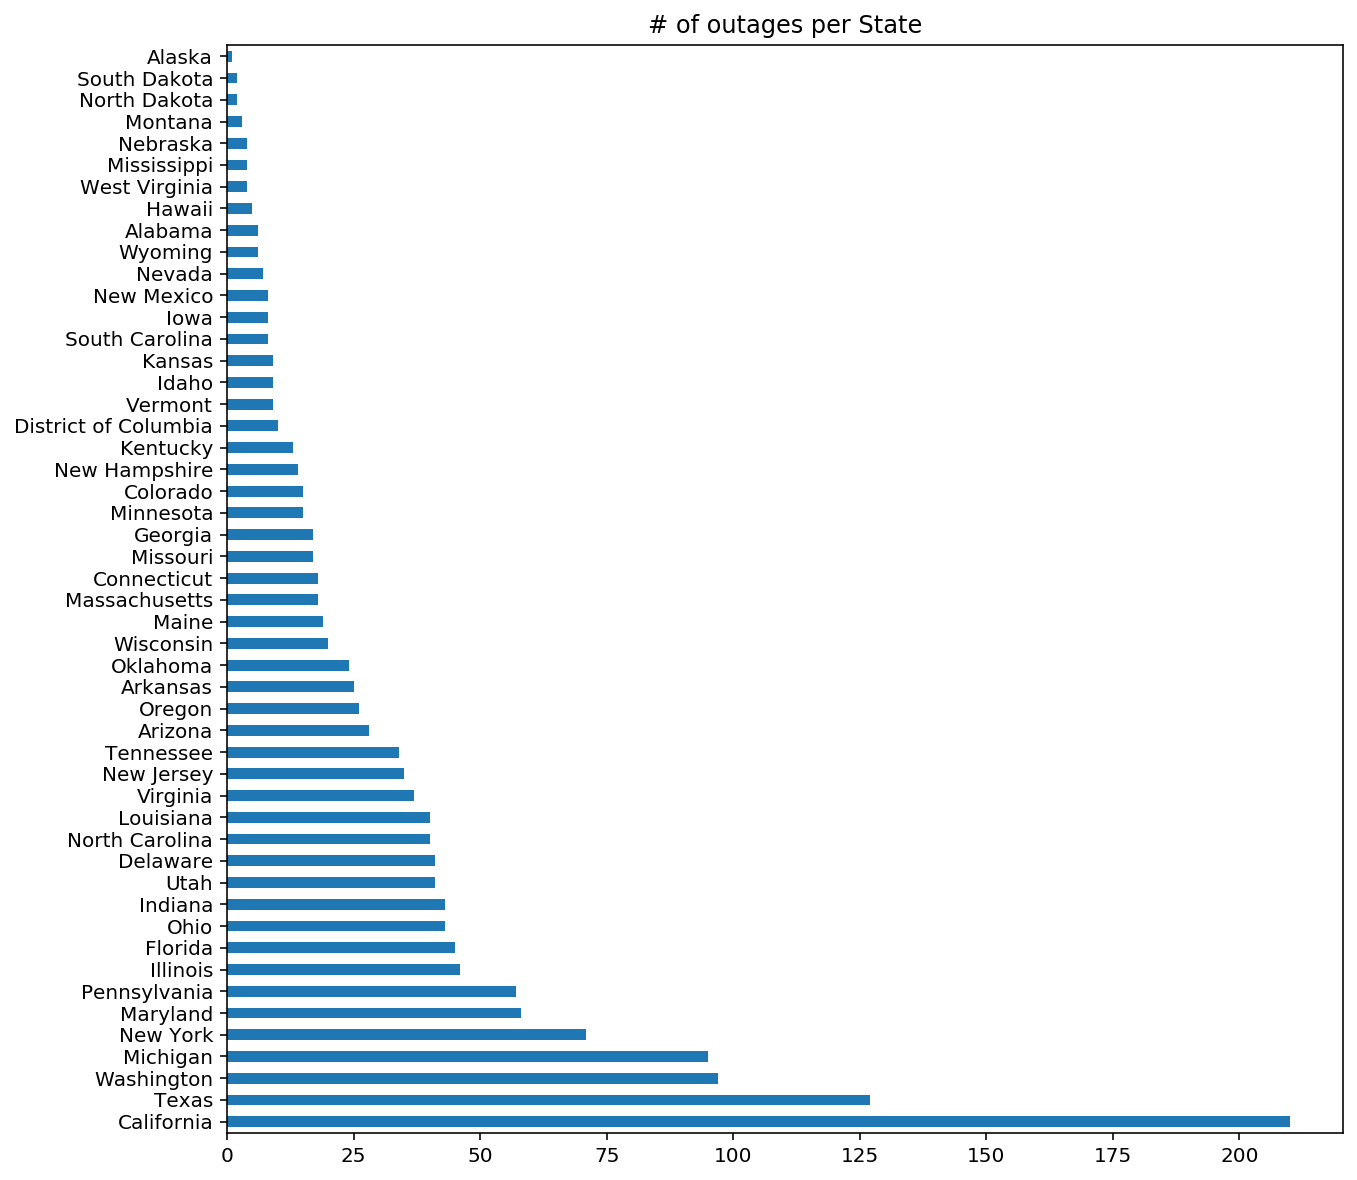

In [14]:
"""
Start of the univariate analysis of the number of outages in each State, Climate Region and Category, and Cause
"""
# plotting bar chart for number of outages per state 
outages['U.S._STATE'].value_counts().plot(kind='barh', figsize=(10, 10), title='# of outages per State');

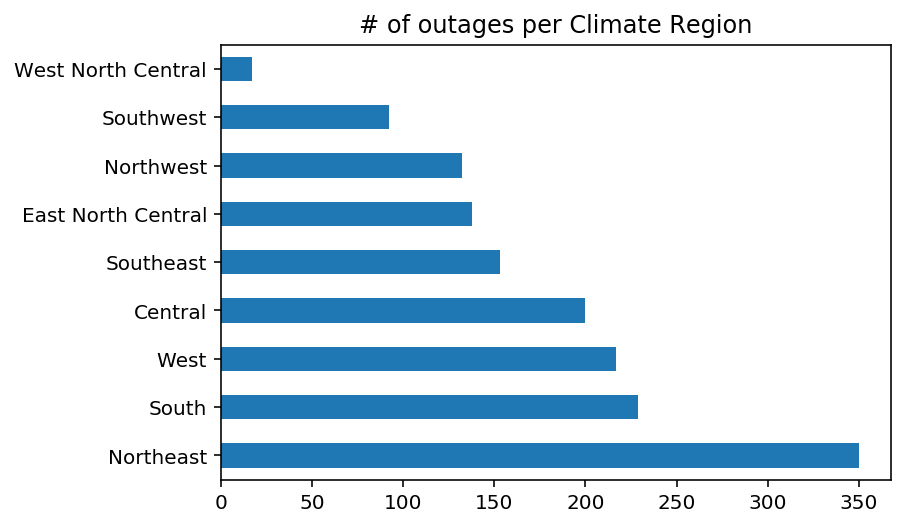

In [15]:
# plotting bar chart for number of outages per climate region  
outages['CLIMATE.REGION'].value_counts().plot(kind='barh', title='# of outages per Climate Region');

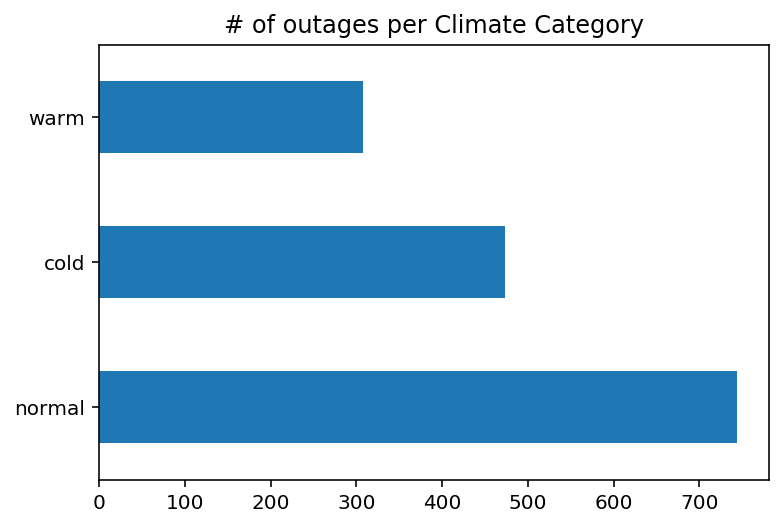

In [16]:
# plotting bar chart for number of outages per climate category  
outages['CLIMATE.CATEGORY'].value_counts().plot(kind='barh', title='# of outages per Climate Category');

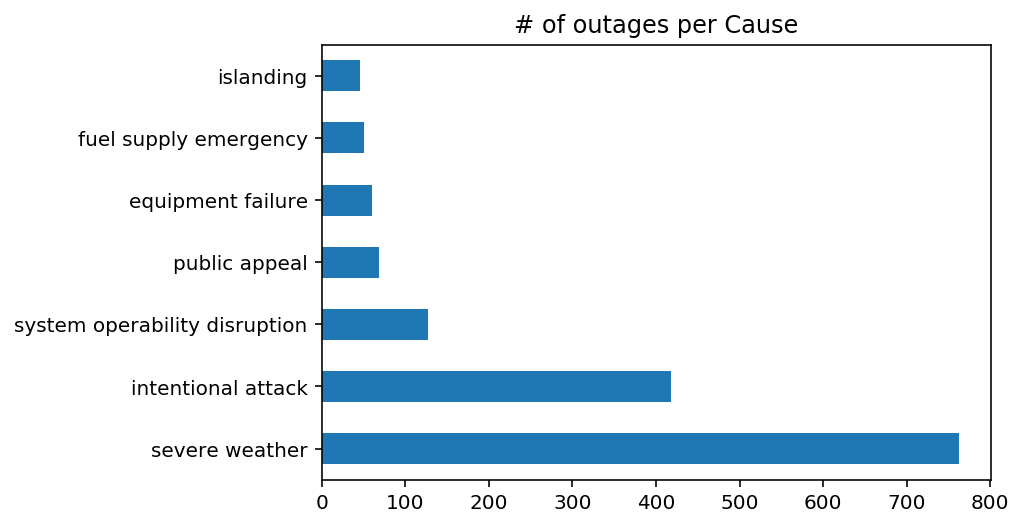

In [17]:
# plotting bar chart for number of outages per cause category  
outages['CAUSE.CATEGORY'].value_counts().plot(kind='barh', title='# of outages per Cause');

In [18]:
"""
Bivariate analysis of the relationship between CAUSE.CATEGORY and CLIMATE.REGION
"""
# Create the pivot table that counts the occurrence of CAUSE.CATEGORY at each CLIMATE.REGION
x = outages.pivot_table(
    index = 'CLIMATE.REGION',
    columns = 'CAUSE.CATEGORY',
    aggfunc = 'size',
    fill_value = 0
)
x

CAUSE.CATEGORY,equipment failure,fuel supply emergency,intentional attack,islanding,public appeal,severe weather,system operability disruption
CLIMATE.REGION,,,,,,,
Central,7,4,38,3,2,135,11
East North Central,3,5,20,1,2,104,3
Northeast,5,14,135,1,4,176,15
Northwest,2,1,89,5,2,29,4
South,10,7,28,2,42,113,27
Southeast,5,0,9,0,5,118,16
Southwest,5,2,64,1,1,10,9
West,21,17,31,28,9,70,41
West North Central,1,1,4,5,2,4,0


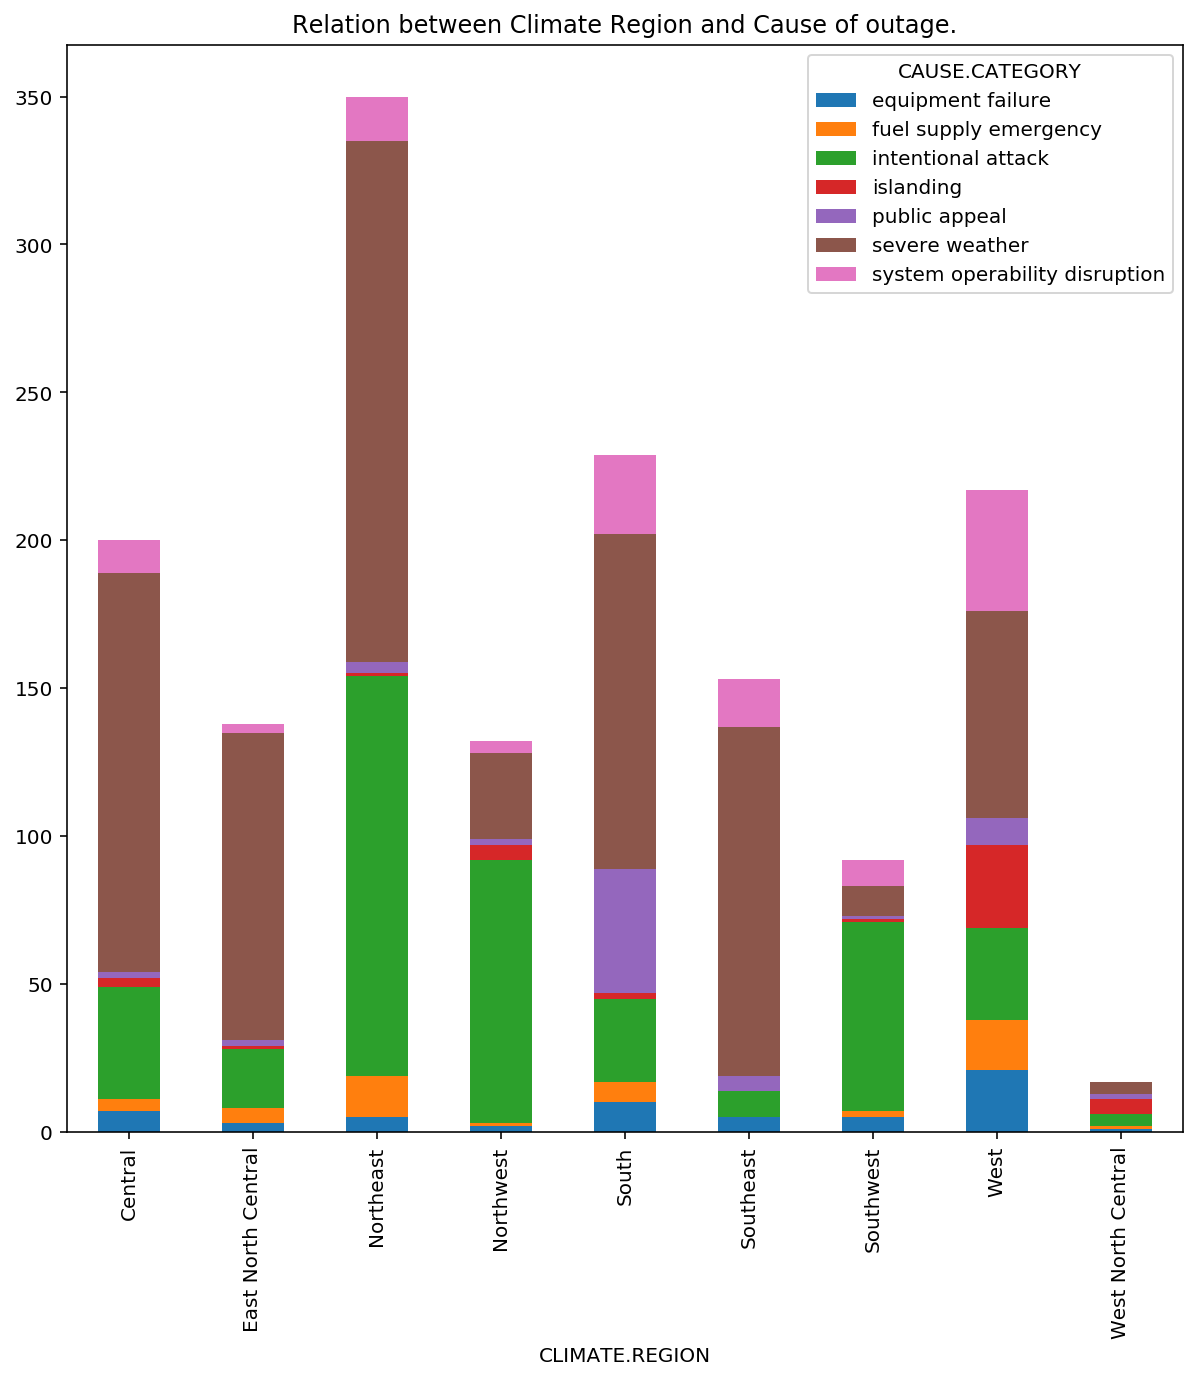

In [19]:
# plotting the results 
x.plot(kind='bar', stacked=True, figsize=(10,10), title='Relation between Climate Region and Cause of outage.');

In [20]:
# group years and get the mean of the total prices of electricity for that year 
yearly_prices = outages.groupby('YEAR')['TOTAL.PRICE'].mean().to_frame()
yearly_prices

,TOTAL.PRICE
YEAR,
2000,7.000526
2001,9.229333
2002,8.385000
2003,8.091957
2004,8.152113
2005,8.833091
2006,9.988485
2007,10.864464
2008,10.709189


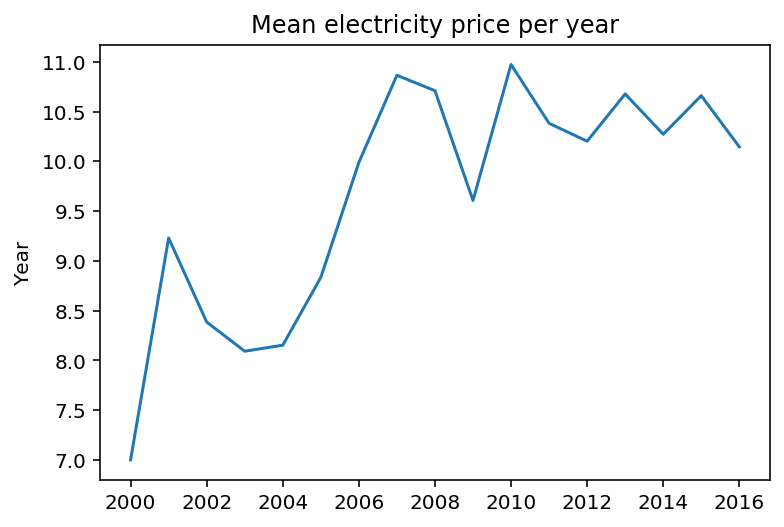

In [21]:
# plot the mean electricity price for each year 
plt.plot(yearly_prices.index, yearly_prices['TOTAL.PRICE'])
plt.title('Mean electricity price per year')
plt.ylabel('Mean Electricity price')
plt.ylabel('Year');

### Assessment of Missingness

In [37]:
outages['OUTAGE.DURATION'].isnull().sum()

58

### Hypothesis Test

In [25]:
"""
Null hypothesis: in the US the distribution of the causes for major outages among the 2 states with most cases 
of major outages is the same. The difference between 2 samples is due to chance. (CA, TX)
Alternative hypothesis: in the US the distributions of the causes of major outages of the two groups are different. 
"""

# getting the rows with California and Texas since they are the states with highest number of outages.
CA_TX = outages[(outages['POSTAL.CODE'] == 'CA') | (outages['POSTAL.CODE'] == 'TX')]
CA_TX = CA_TX[['POSTAL.CODE', 'CAUSE.CATEGORY']].reset_index(drop=True) # just getting neccessary columns 
CA_TX

,POSTAL.CODE,CAUSE.CATEGORY
0,TX,system operability disruption
1,TX,severe weather
2,TX,system operability disruption
3,TX,severe weather
4,TX,intentional attack
...,...,...
332,CA,severe weather
333,CA,fuel supply emergency
334,CA,equipment failure
335,CA,system operability disruption


In [26]:
# get count 
count = CA_TX.pivot_table(
            index = 'CAUSE.CATEGORY', 
            columns = 'POSTAL.CODE', 
            aggfunc = 'size',
            fill_value = 0)
# normalize the values 
normalized = count.apply(lambda x: x / x.sum())

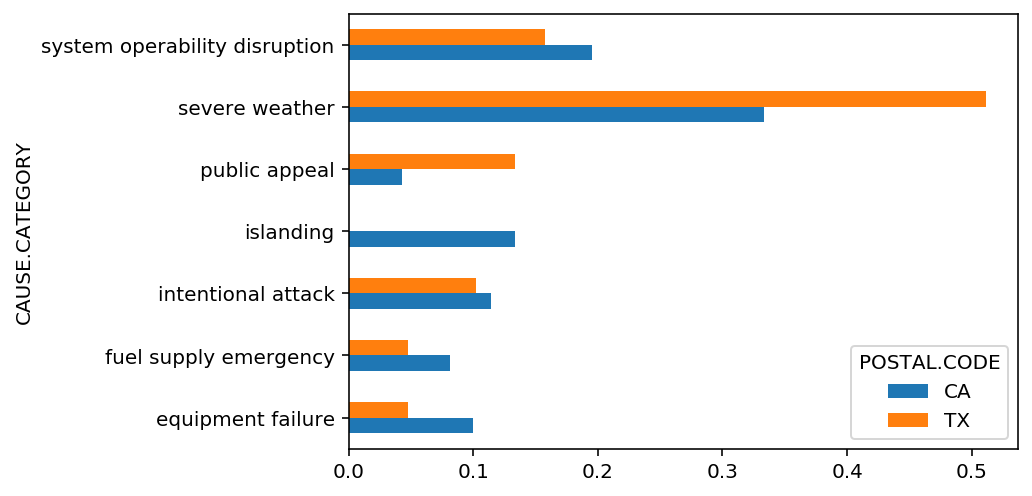

In [27]:
normalized.plot(kind='barh'); # print distribution in bar chart 

In [28]:
"""
Function to calculate the tvd of a given dataframe 
"""
def tvd(df):
    # get the count 
    count = df.pivot_table(
            index = 'CAUSE.CATEGORY', 
            columns = 'POSTAL.CODE', 
            aggfunc = 'size',
            fill_value = 0)
    # normalize the values 
    normalized = count.apply(lambda x: x / x.sum())
    # return the calculated tvd 
    return normalized.diff(axis=1).iloc[:,-1].abs().sum() / 2 

In [29]:
obs_tvd = tvd(CA_TX) # getting the observed tvd 

In [30]:
# simulating values 1000 times
N = 1000
tvds = []
for _ in range(N):
    #shuffle the column representing the state 
    shuffled = CA_TX['POSTAL.CODE'].sample(frac=1, replace=False).reset_index(drop=True)
    # add shuffled column to the categories 
    shuffled_df = CA_TX[['CAUSE.CATEGORY']].assign(**{'POSTAL.CODE': shuffled})
    
    tvds.append(tvd(shuffled_df)) # calculate the tvd and append to list 
    
tvds = pd.Series(tvds) 

In [31]:
# calculate the p-value 
pval = (tvds >= obs_tvd).sum() / N

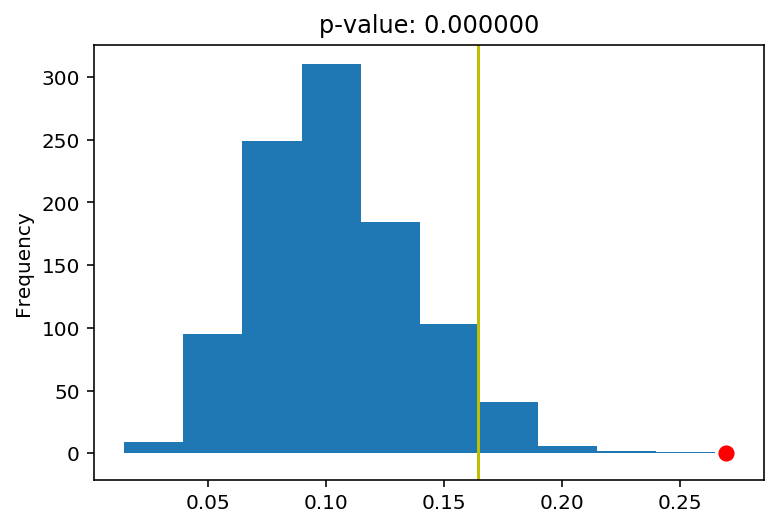

In [32]:
# plotting to check results 
tvds.plot(kind='hist', title='p-value: %f' % pval)
plt.scatter([obs_tvd], [0], s=50, color='r')
perc = np.percentile(tvds, 95) # 5% significance level
plt.axvline(x=perc, color='y');